# Market Analyst Agent - Notebook

This notebook is for running and testing individual agents before wiring them into the API.

In [1]:
# Load env vars from .env
import os
from pathlib import Path
from dotenv import load_dotenv

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
load_dotenv(root / '.env')

# Optional: sanity check for required envs
required = [
    'AZURE_OPENAI_ENDPOINT',
    'AZURE_OPENAI_API_KEY',
    'AZURE_OPENAI_DEPLOYMENT',
    'TAVILY_API_KEY',
]
missing = [k for k in required if not os.getenv(k)]
if missing:
    print('Missing env vars:', missing)
else:
    print('All required env vars present')


All required env vars present


In [2]:
# Import and build the web search agent
import sys
from pathlib import Path
from langchain.messages import HumanMessage

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
sys.path.append(str(root / 'backend'))

from app.agents.news.web_search_agent import build_web_search_agent

agent = build_web_search_agent()
print('Agent ready')


Agent ready


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\news\web_search_agent.py:46: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  TavilySearchResults(max_results=5),


In [5]:
# Run a query
query = 'latest quarterly earnings for NVIDIA'
result = agent.invoke({'messages': [HumanMessage(content=query)]})
result


{'messages': [HumanMessage(content='latest quarterly earnings for NVIDIA', additional_kwargs={}, response_metadata={}, id='e7bb13c8-1768-4a67-9edf-6b1407020feb'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 191, 'total_tokens': 230, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DBZ5cTnlmanArd3k5zoKegI2rn1xy', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'sa

## Technical Analysis Agent


In [3]:
# Import and run technical chart agent
from app.agents.technical.technical_chart_agent import analyze_stock_technical

result = analyze_stock_technical('AAPL')
result


Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


TechnicalAnalysisResult(symbol='AAPL', image_path='data\\processed\\AAPL_technical.png', summary='- **Trend (price action):** After a December/early‑January decline into a mid‑January low (~245–250), AAPL staged a strong rebound into early February (~278–280) and has since **pulled back and moved sideways** around **~258–265**. Near-term structure looks like **consolidation after a sharp rally**.\n- **Momentum (MACD):** MACD turned up strongly in late January/early February (bullish momentum phase), but the histogram has been **shrinking** and the MACD/Signal lines are **flattening near/above zero**, indicating **waning upside momentum**.\n- **Notable crossovers:** A **bullish MACD crossover** occurred in late January (helped drive the rally). More recently, MACD is **close to a potential bearish crossover** (or already marginal), which would confirm **momentum rollover** if it continues.\n- **RSI (overbought/oversold):** RSI bottomed near **oversold (~30)** at the January low, then re

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [6]:
print(result.summary)

- **Trend (price action):** After a December/early‑January decline into a mid‑January low (~245–250), AAPL staged a strong rebound into early February (~278–280) and has since **pulled back and moved sideways** around **~258–265**. Near-term structure looks like **consolidation after a sharp rally**.
- **Momentum (MACD):** MACD turned up strongly in late January/early February (bullish momentum phase), but the histogram has been **shrinking** and the MACD/Signal lines are **flattening near/above zero**, indicating **waning upside momentum**.
- **Notable crossovers:** A **bullish MACD crossover** occurred in late January (helped drive the rally). More recently, MACD is **close to a potential bearish crossover** (or already marginal), which would confirm **momentum rollover** if it continues.
- **RSI (overbought/oversold):** RSI bottomed near **oversold (~30)** at the January low, then recovered to the **mid/upper‑50s** during the rally. It has since eased back to around **~50**, suggest

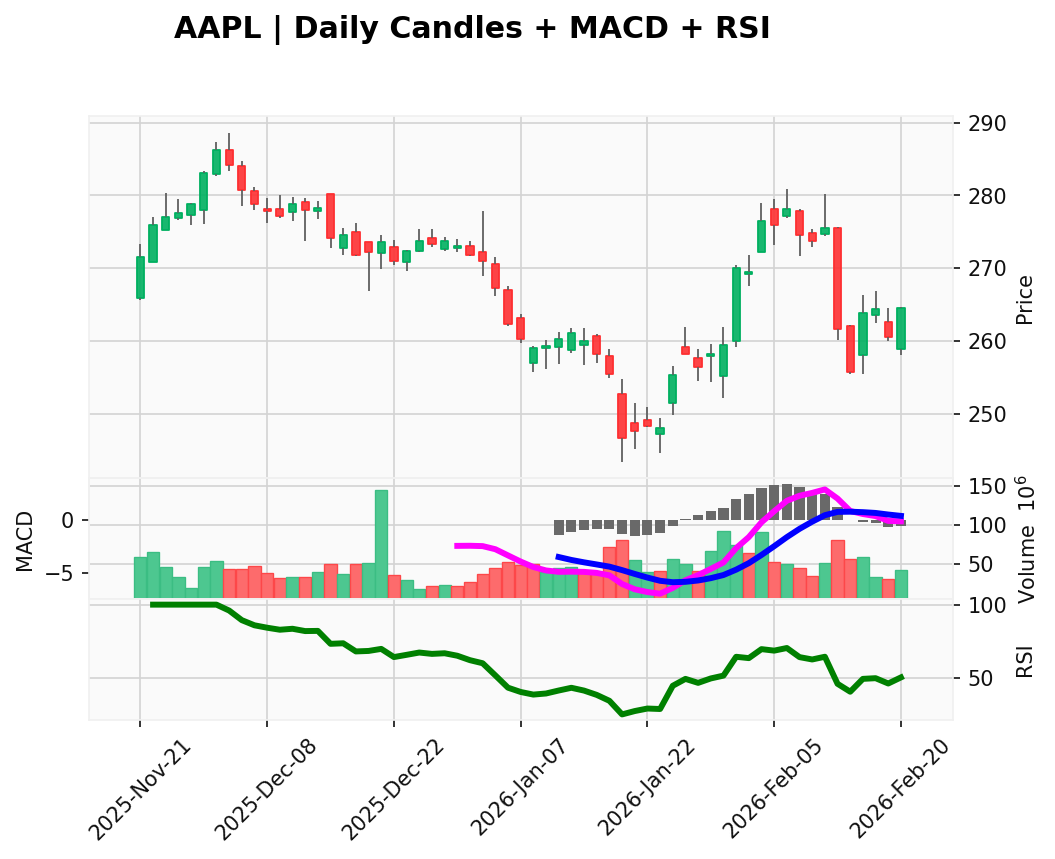

In [4]:
# Display chart image
from IPython.display import Image, display

display(Image(filename=result.image_path))


## Fundamental Analysis Agent - Ingestion

This cell ingests a company PDF into pgvector using Azure Document Intelligence.


In [ ]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.services.document_ingestion import ingest_pdf_to_pgvector
filename = "VBL-AR-2024"
pdf_path = root / "documents" / f"{filename}.pdf"
result = ingest_pdf_to_pgvector(
    pdf_path=pdf_path,
    company="VBL",
    year="2024",
    markdown_output_path=root / "ingested_documents" / f"{filename}.md",
)
result


## Fundamental Analysis Agent - Load Markdown (No PDF)

Use this if you already have a markdown file and only want to push it into pgvector.


In [5]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.services.document_ingestion import split_markdown_into_chunks, store_chunks_pgvector, _attach_metadata

# Point to an existing markdown file produced by Azure Document Intelligence
markdown_path = root / "ingested_documents"
markdown_text = markdown_path.read_text(encoding="utf-8")

chunks = split_markdown_into_chunks(markdown_text)
enriched = _attach_metadata(
    chunks,
    company="VBL",
    doc_type="annual_report",
    year="2024",
    source_path=str(markdown_path),
)

store_chunks_pgvector(
    enriched,
    collection_name="fundamental_docs",
    connection_string=None,
)

print(f"Stored {len(enriched)} chunks from markdown.")


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\.venv\Lib\site-packages\langchain_community\vectorstores\pgvector.py:490: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  store = cls(


Stored 1069 chunks from markdown.


## Fundamental Analysis Agent - Run

Run the agentic RAG over the ingested company data.


In [3]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.agents.fundamental.fundamental_agent import analyze_fundamentals

# General fundamentals summary
general = analyze_fundamentals(
    company="VBL",
    mode="general",
)
general.answer


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: This class is pending deprecation and may be removed in a future version. You can swap to using the `PGVector` implementation in `langchain_postgres`. Please read the guidelines in the doc-string of this class to follow prior to migrating as there are some differences between the implementations. See <https://github.com/langchain-ai/langchain-postgres> for details about the new implementation.
  return PGVector(
c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been ch

Company Retriever Tool Invoked with query: Provide key financial highlights, revenue, net income, cash flow, and major risks from the latest annual report. Also include segment performance and outlook. VBL
Retrieved 8 documents for query: Provide key financial highlights, revenue, net income, cash flow, and major risks from the latest annual report. Also include segment performance and outlook.
Company Retriever Tool Invoked with query: cash flow from operating activities investing financing FY 2024 consolidated Varun Beverages annual report net cash VBL
Retrieved 8 documents for query: cash flow from operating activities investing financing FY 2024 consolidated Varun Beverages annual report net cash
Company Retriever Tool Invoked with query: principal risks risk management key risks Varun Beverages annual report 2024 management discussion analysis VBL
Retrieved 8 documents for query: principal risks risk management key risks Varun Beverages annual report 2024 management discussion ana

{'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 177, 'total_tokens': 225, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DBanfOMoaDmi9gYzD2S4tHKr7SOtl', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='lc_run--019c7ee4-a076-7da2-9451-4f3b0329055a-0', tool_calls=[{'name': 'company_retriever', 'args': {'query': 'Provide key financial highlights, revenue, net income, cash flow, and major risks from the latest annual report. Also include segment performance and outlook.'}, 'id': 'call_gQeYo3ENQKAC852Va3j3pU10', 'type

In [9]:
print(general.answer['messages'][-1].content)

## Varun Beverages Ltd (VBL) — FY ended 31 Dec 2024 (Annual Report 2024)

### Key financial highlights (Consolidated)
- **Total income (revenue + other income):** ₹ **206,025.96m** (FY23: ₹164,004.22m)  
- **Revenue from operations:** ₹ **204,813.28m** (FY23: ₹163,210.63m)  
- **Net revenues (after excise duty):** ₹ **200,076.50m**, **+24.7% YoY** (FY23: ₹160,425.81m)  
- **EBITDA:** ₹ **47,110.71m**, **+30.5% YoY** (FY23: ₹36,094.85m)  
- **Profit before tax (PBT):** ₹ **34,330.89m**, **+25.3% YoY** (FY23: ₹27,393.60m)  
- **Net profit (PAT):** ₹ **26,342.85m**, **+25.3% YoY** (FY23: ₹21,018.13m)  
  - **PAT attributable to owners:** ₹ **25,946.33m** (FY23: ₹20,559.22m)

### Cash flow highlights (Consolidated)
- **Net cash from operating activities (CFO):** ₹ **33,810.97m** (FY23: ₹23,907.78m)  
- **Net cash used in investing (CFI):** ₹ **(43,167.80)m** (FY23: ₹(32,898.67)m)  
  - Includes **capex** (purchase of PPE/ROU/intangibles) of ₹ **(37,790.10)m**
- **Net cash from financing (C

In [10]:
# Specific question
qa = analyze_fundamentals(
    company="VBL",
    question="How has free cash flow changed year over year?",
    mode="qa",
)
qa.answer

c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  return PGVector(


Company Retriever Tool Invoked with query:  VBL
Retrieved 8 documents for query: 
{'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 177, 'total_tokens': 196, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DBapAgIRgrpYVTRxWm3SUG8nUUHc7', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='lc_run--019c7ee6-0dc0-7602-bd69-8e809a0bb413-0', tool_calls=[{'name': 'company_retriever', 'args': {'query': ''}, 'id': 'call_G9r6fYhJXZ8SjS0SiKgcbcpB', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 177

{'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 177, 'total_tokens': 196, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DBapAgIRgrpYVTRxWm3SUG8nUUHc7', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'tool_calls', 'logprobs': None, 'content_filter_results': {}}, id='lc_run--019c7ee6-0dc0-7602-bd69-8e809a0bb413-0', tool_calls=[{'name': 'company_retriever', 'args': {'query': ''}, 'id': 'call_G9r6fYhJXZ8SjS0SiKgcbcpB', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 177, 'output_tokens': 19, 'total_tokens': 196, 'input_token_details': {'audio': 0, 'c